In [13]:
import pandas as pd
import numpy as np

## 

In [14]:
data=pd.read_csv('fifa21_train.csv')
data_test=data.copy()

In [15]:
#Standardize header names.

data.columns = list(map(lambda x: x.lower(), data.columns))
data.columns = data.columns.str.replace(" ","_")
display(data)
data.shape

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,...,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,214680,G. Gallon,27,France,ESTAC Troyes,GK,GK,ESTAC Troyes 2019 ~ 2022,"6'1""",174lbs,...,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,221489,J. Flores,22,Chile,CD Antofagasta,RM,LM CAM RM,CD Antofagasta 2019 ~ 2024,"5'6""",143lbs,...,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67
11699,146717,Anderson Silva,26,Brazil,Barnsley,CM,NaN,Barnsley 2010,"6'2""",179lbs,...,68+0,68+0,66+0,64+0,60+0,60+0,60+0,64+0,25+0,68


(11701, 101)

In [16]:
nulls_data = data.isna().sum()
display(nulls_data)
data.shape

id              0
name            0
age             0
nationality     0
club           18
               ..
cb              0
rcb             0
rb              0
gk              0
ova             0
Length: 101, dtype: int64

(11701, 101)

In [17]:
#removing duplicate ones
data = data.drop_duplicates()
data.shape

(11701, 101)

In [18]:
#Dealing with NaN value in "culb ,'position', 'joined','composure'"
data=data[(data['club'].isna()==False) &
          (data['position'].isna()==False) &
          (data['joined'].isna()==False) & 
          (data['composure'].isna()==False)]


In [19]:
#Dealing with NaN value in "loan_date_end'"
data = data.drop(['loan_date_end'], axis=1)
data.shape

(11211, 100)

In [20]:
#Which columns are numerical
display(data.select_dtypes(np.number).columns)

#Which columns are categorical?
display(data.select_dtypes('object').columns)

Index(['id', 'age', 'growth', 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats',
       'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'ova'],
      dtype='object')

Index(['name', 'nationality', 'club', 'bp', 'position', 'team_&_contract',
       'height', 'weight', 'foot', 'joined', 'value', 'wage', 'release_clause',
       'contract', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'hits', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk'],
      dtype='object')

In [21]:
#Cleanig height values and trns
def inches(x):
        if len(x) == 5:
            a = int(str(x)[0])*12 
            b = int(str(x)[2]+str(x)[3])  
        elif len(x) == 4:
            a = int(str(x)[0])*12 
            b = int(str(x)[2])
        return a+b
    
data['height']=data['height'].apply(inches)
data.shape


(11211, 100)

In [22]:
#Cleanig weight in column 
def clean_lbs(x):
        x = float(str(x).replace('lbs',''))
        return x
    
data['weight']=data['weight'].apply(clean_lbs)
data.shape

(11211, 100)

In [23]:
nulls_data = data.isna().sum()
display(nulls_data)
nulls_data.to_csv('nulls_data.csv')
data.shape

id             0
name           0
age            0
nationality    0
club           0
              ..
cb             0
rcb            0
rb             0
gk             0
ova            0
Length: 100, dtype: int64

(11211, 100)

In [24]:
#cleaning 
def clean(x):
    x = str(str(x).replace(" ",''))
    x = str(str(x).replace("€",''))
    if x[-1] == "K":
        x = float(str(x).replace("K",''))*1000        
    elif x[-1] == "M":
        x = float(str(x).replace("M",''))*1000000
    return float(x)

data['value']=data['value'].apply(clean)
data['wage']=data['wage'].apply(clean)
data['release_clause']=data['release_clause'].apply(clean)
data['hits']=data['hits'].apply(clean)


#def k_M(x):

data.to_csv('data.csv')
data.shape

(11211, 100)

In [25]:
def clean_star(x):
    x = str(str(x).replace(" ",''))
    x = int(str(x).replace("★",''))
    return int(x)
data['w/f']=data['w/f'].apply(clean_star)
data['sm']=data['sm'].apply(clean_star)
data['ir']=data['ir'].apply(clean_star)

data.to_csv('data.csv')
data.shape

(11211, 100)

In [26]:


data2 = data.T.drop_duplicates().T
data= data[data2.columns]
data.dtypes




id              int64
name           object
age             int64
nationality    object
club           object
                ...  
ldm            object
lb             object
lcb            object
gk             object
ova             int64
Length: 84, dtype: object

In [27]:
#data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11211 entries, 0 to 11700
Data columns (total 84 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                11211 non-null  int64  
 1   name              11211 non-null  object 
 2   age               11211 non-null  int64  
 3   nationality       11211 non-null  object 
 4   club              11211 non-null  object 
 5   bp                11211 non-null  object 
 6   position          11211 non-null  object 
 7   team_&_contract   11211 non-null  object 
 8   height            11211 non-null  int64  
 9   weight            11211 non-null  float64
 10  foot              11211 non-null  object 
 11  growth            11211 non-null  int64  
 12  joined            11211 non-null  object 
 13  value             11211 non-null  float64
 14  wage              11211 non-null  float64
 15  release_clause    11211 non-null  float64
 16  contract          11211 non-null  object

In [28]:
# dealing with + values in 
def split1(x):
    x = str(x).split('+')
    x[1] = int(x[1])
    x[0] = int(x[0])
    x = sum(x)
    return int(x)

data['ls']= data['ls'].apply(split1)
data['lw']= data['lw'].apply(split1)
data['lf']= data['lf'].apply(split1)
data['lam']= data['lam'].apply(split1)
data['lm']= data['lm'].apply(split1)
data['lcm']= data['lcm'].apply(split1)                             
data['lwb']= data['lwb'].apply(split1)
data['ldm']= data['ldm'].apply(split1)
data['lb']= data['lb'].apply(split1)
data['lcb']= data['lcb'].apply(split1)
data['gk']= data['gk'].apply(split1)





In [29]:

data.shape

(11211, 84)

In [30]:
def sup_f(df):
    df.columns = list(map(lambda x: x.lower(), df.columns))
    df.columns = df.columns.str.replace(" ","_")
    df = df.drop_duplicates()
    df = df.drop(['loan_date_end'], axis=1)
    df = df[(df['club'].isna()==False) & (df['position'].isna()==False) & (df['joined'].isna()==False) & (df['composure'].isna()==False)]
    df['height']=df['height'].apply(inches)
    df['weight']=df['weight'].apply(clean_lbs)
    df['value']=df['value'].apply(clean)
    df['wage']=df['wage'].apply(clean)
    df['release_clause']=df['release_clause'].apply(clean)
    df['hits']=df['hits'].apply(clean)
    df['w/f']=df['w/f'].apply(clean_star)
    df['sm']=df['sm'].apply(clean_star)
    df['ir']=df['ir'].apply(clean_star)
    df2 = df.T.drop_duplicates().T
    df= df[df2.columns]
    df['ls']= df['ls'].apply(split1)
    df['lw']= df['lw'].apply(split1)
    df['lf']= df['lf'].apply(split1)
    df['lam']= df['lam'].apply(split1)
    df['lm']= df['lm'].apply(split1)
    df['lcm']= df['lcm'].apply(split1)                             
    df['lwb']= df['lwb'].apply(split1)
    df['ldm']= df['ldm'].apply(split1)
    df['lb']= df['lb'].apply(split1)
    df['lcb']= df['lcb'].apply(split1)
    df['gk']= df['gk'].apply(split1)
    return df.shape


In [31]:
sup_f(data_test)

(11211, 84)

In [32]:
def col_name(df):
    df.columns = list(map(lambda x: x.lower(), df.columns))
    df.columns = df.columns.str.replace(" ","_")
    return(df)

def drop(df):
    df = df.drop_duplicates()
    df = df.drop(['loan_date_end'], axis=1)
    df2 = df.T.drop_duplicates().T
    df= df[df2.columns]
    return(df)

def nan(df):
    df = df[(df['club'].isna()==False) & (df['position'].isna()==False) & (df['joined'].isna()==False) & (df['composure'].isna()==False)]
    return(df)

def h(df):
    def inches(x):
        if len(x) == 5:
            a = int(str(x)[0])*12 
            b = int(str(x)[2]+str(x)[3])
        elif len(x) == 4:
            a = int(str(x)[0])*12 
            b = int(str(x)[2])
        return a+b
    df['height']=df['height'].apply(inches)
    return df
    
def w(df):
    df['weight']=df['weight'].apply(clean_lbs)
    return df

def clean_v(df):
    def clean(x):
        x = str(str(x).replace(" ",''))
        x = str(str(x).replace("€",''))
        if x[-1] == "K":

            x = float(str(x).replace("K",''))*1000        
        elif x[-1] == "M":
            x = float(str(x).replace("M",''))*1000000
        return float(x)
    
    df['value']=df['value'].apply(clean)
    df['wage']=df['wage'].apply(clean)
    df['release_clause']=df['release_clause'].apply(clean)
    df['hits']=df['hits'].apply(clean)
    return(df)

def clean_stars(df):
    def clean_star(x):
        x = str(str(x).replace(" ",''))
        x = int(str(x).replace("★",''))
        return int(x)
    df['w/f']=df['w/f'].apply(clean_star)
    df['sm']=df['sm'].apply(clean_star)
    df['ir']=df['ir'].apply(clean_star)
    return(df)

def splits(df):
    def split1(x):
        x = str(x).split('+')
        x[1] = int(x[1])
        x[0] = int(x[0])
        x = sum(x)
        return int(x)
    df['ls']= df['ls'].apply(split1)
    df['lw']= df['lw'].apply(split1)
    df['lf']= df['lf'].apply(split1)
    df['lam']= df['lam'].apply(split1)
    df['lm']= df['lm'].apply(split1)
    df['lcm']= df['lcm'].apply(split1)                             
    df['lwb']= df['lwb'].apply(split1)
    df['ldm']= df['ldm'].apply(split1)
    df['lb']= df['lb'].apply(split1)
    df['lcb']= df['lcb'].apply(split1)
    df['gk']= df['gk'].apply(split1)
    return df



   

In [33]:
def all_f(df):
    df2=col_name(df)
    df2=drop(df2)
    df2=nan(df2)
    df2=h(df2)
    df2=w(df2)
    df2=clean_v(df2)
    df2=clean_stars(df2)
    df2=splits(df2)
    return df2

In [34]:
all_f(data_test)

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,...,lf,lam,lm,lcm,lwb,ldm,lb,lcb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,69,161.0,...,62,64,64,64,60,60,59,55,16,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",72,159.0,...,77,77,77,70,59,55,55,50,20,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,64,134.0,...,79,80,80,76,61,58,55,43,14,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,70,152.0,...,51,55,55,58,58,60,59,60,16,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,71,150.0,...,59,63,64,65,66,66,65,63,17,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,196848,I. Ávila,29,Peru,Melgar FBC,ST,ST,Melgar FBC 2019 ~ 2021,67,154.0,...,63,62,60,55,48,47,46,45,21,65
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,73,168.0,...,52,56,60,58,65,62,65,63,18,65
11697,214680,G. Gallon,27,France,ESTAC Troyes,GK,GK,ESTAC Troyes 2019 ~ 2022,73,174.0,...,26,26,27,27,27,28,26,28,71,70
11698,221489,J. Flores,22,Chile,CD Antofagasta,RM,LM CAM RM,CD Antofagasta 2019 ~ 2024,66,143.0,...,65,67,68,60,51,46,47,37,19,67


In [35]:
numerical = data.select_dtypes(np.number)


In [36]:
display(numerical)

,id,age,height,weight,growth,value,wage,release_clause,attacking,crossing,...,lf,lam,lm,lcm,lwb,ldm,lb,lcb,gk,ova
0,184383,26,69,161.0,1,525000.0,4000.0,801000.0,258,54,...,62,64,64,64,60,60,59,55,16,64
1,188044,30,72,159.0,0,8500000.0,23000.0,0.0,365,66,...,77,77,77,70,59,55,55,50,20,77
2,184431,33,64,134.0,0,9000000.0,49000.0,15300000.0,336,73,...,79,80,80,76,61,58,55,43,14,80
3,233796,22,70,152.0,13,275000.0,4000.0,694000.0,242,44,...,51,55,55,58,58,60,59,60,16,59
4,234799,23,71,150.0,8,725000.0,2000.0,1400000.0,249,49,...,59,63,64,65,66,66,65,63,17,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,196848,29,67,154.0,0,550000.0,500.0,1200000.0,290,36,...,63,62,60,55,48,47,46,45,21,65
11696,232504,25,73,168.0,5,625000.0,3000.0,891000.0,224,62,...,52,56,60,58,65,62,65,63,18,65
11697,214680,27,73,174.0,4,1600000.0,4000.0,2900000.0,84,12,...,26,26,27,27,27,28,26,28,71,70
11698,221489,22,66,143.0,8,1100000.0,2000.0,1700000.0,286,64,...,65,67,68,60,51,46,47,37,19,67


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

result=data

y=result['ova']
x=result[['reactions','pas','composure']]

plt.figure(figsize=(15, 15))
correlations_matrix = result.corr()

display(correlations_matrix)

correlations_matrix.to_csv('m.csv')

#sns.heatmap(correlations_matrix, annot=True)
#plt.show()



,id,age,height,weight,growth,value,wage,release_clause,attacking,crossing,...,lf,lam,lm,lcm,lwb,ldm,lb,lcb,gk,ova
id,1.000000,-0.768282,-0.089530,-0.202166,0.627186,-0.166784,-0.265518,-0.144599,-0.201562,-0.171853,...,-0.170192,-0.170198,-0.143390,-0.217185,-0.143211,-0.197792,-0.134143,-0.165467,-0.139319,-0.483211
age,-0.768282,1.000000,0.089712,0.248428,-0.868231,0.122827,0.205905,0.103873,0.198538,0.164675,...,0.159186,0.156566,0.133607,0.221737,0.173292,0.233115,0.170058,0.211640,0.147628,0.528063
height,-0.089530,0.089712,1.000000,0.766580,-0.051443,-0.000384,0.021156,-0.002255,-0.350791,-0.489517,...,-0.434740,-0.449898,-0.468524,-0.381978,-0.296000,-0.177157,-0.237278,-0.033623,0.348902,0.023974
weight,-0.202166,0.248428,0.766580,1.000000,-0.216253,0.041292,0.067328,0.032878,-0.249800,-0.389058,...,-0.327192,-0.344495,-0.365648,-0.280954,-0.224892,-0.109831,-0.177068,0.013192,0.325745,0.147832
growth,0.627186,-0.868231,-0.051443,-0.216253,1.000000,-0.198915,-0.237701,-0.175008,-0.286021,-0.256621,...,-0.262657,-0.259371,-0.245114,-0.315527,-0.263320,-0.300149,-0.251039,-0.261776,-0.085203,-0.604549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ldm,-0.197792,0.233115,-0.177157,-0.109831,-0.300149,0.283267,0.278924,0.272210,0.644842,0.661388,...,0.599926,0.650624,0.680828,0.834060,0.974050,1.000000,0.982407,0.961657,-0.616302,0.466649
lb,-0.134143,0.170058,-0.237278,-0.177068,-0.251039,0.254968,0.246635,0.245633,0.648344,0.704222,...,0.606938,0.651692,0.698588,0.817571,0.991775,0.982407,1.000000,0.952945,-0.662958,0.412541
lcb,-0.165467,0.211640,-0.033623,0.013192,-0.261776,0.212201,0.221128,0.204466,0.495366,0.503357,...,0.416879,0.462122,0.502146,0.674396,0.914093,0.961657,0.952945,1.000000,-0.564111,0.379876
gk,-0.139319,0.147628,0.348902,0.325745,-0.085203,0.054978,0.033432,0.052209,-0.736229,-0.626866,...,-0.677912,-0.677957,-0.710938,-0.684769,-0.688549,-0.616302,-0.662958,-0.564111,1.000000,0.102786


<Figure size 1080x1080 with 0 Axes>

22.464733807765562
[0.48016145 0.15592585 0.08496977]
0.8163341471092278


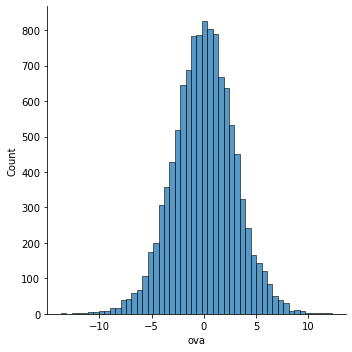

0    0.039721
1    0.037334
2   -2.091111
dtype: float64

In [38]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split



lm = linear_model.LinearRegression()
lm = LinearRegression()
lm.fit(x,y) 
print(lm.intercept_) 
print(lm.coef_)
print(lm.score(x,y))

Y_error_1= y-lm.predict(x)
sns.displot(Y_error_1, bins=50)
plt.show()

# Normalizing data
transformer = Normalizer().fit(x)
x_normalized = transformer.transform(x)
test=pd.DataFrame(x_normalized)
display(test.skew())

#Xtrain and y-Train

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=500)


array([67.63641986, 64.70763312, 64.44196967, ..., 55.70268529,
       61.56686574, 68.79145013])

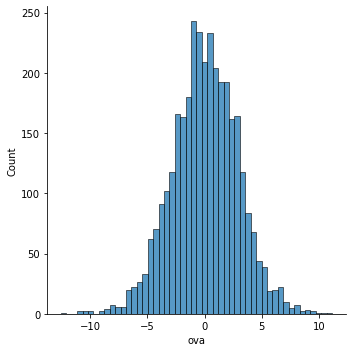

In [39]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)
r2_score_train = r2_score(y_pred_train, y_train)
r2_score_test = r2_score(y_pred_test, y_test)

display(y_pred_test)

Y_error= y_test-y_pred_test

sns.displot(Y_error, bins=50)
plt.show()

<AxesSubplot:xlabel='ova', ylabel='Count'>

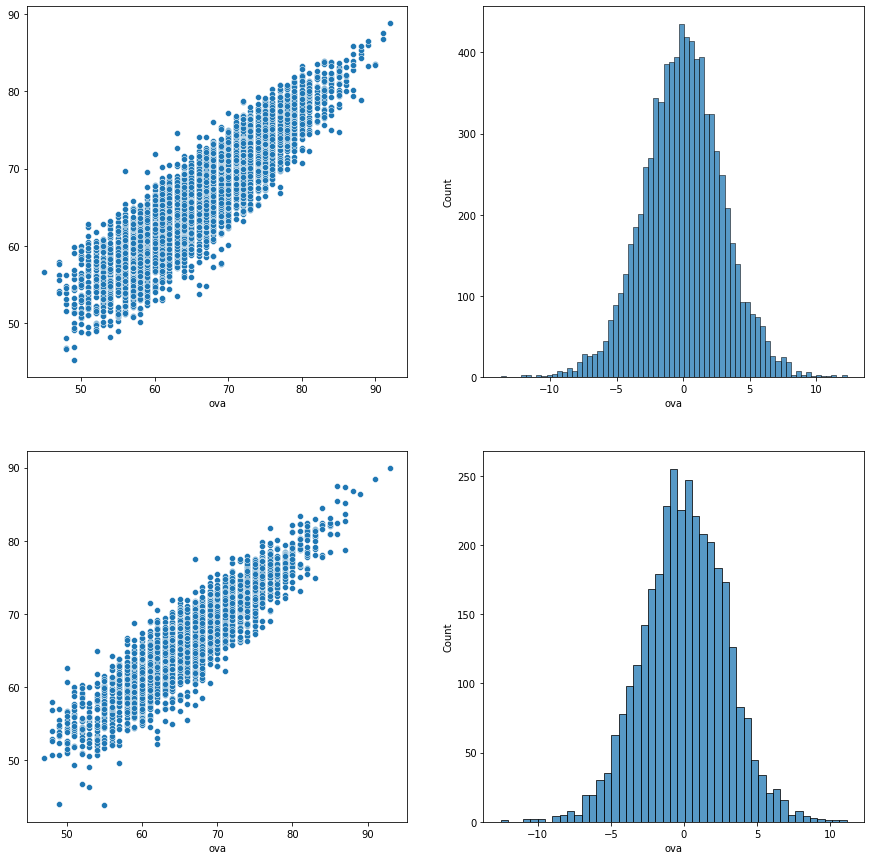

In [40]:
fig,ax=plt.subplots(2,2 , figsize=(15,15))
sns.scatterplot(y=y_pred_train , x=y_train, ax=ax[0,0])
sns.histplot(x=y_train - y_pred_train, ax=ax[0,1])
sns.scatterplot(y=y_pred_test , x=y_test ,ax=ax[1,0])
sns.histplot(x=y_test - y_pred_test, ax=ax[1,1])

#sns.scatterplot(y=y_pred_train , x=y_Train , ax=[0,0])